Import Data From yfinance

In [23]:
import yfinance as yf
import pandas as pd
from datetime import datetime
tickers=['SPY','TLT','GLD','VNQ']
start_date='2018-01-01'
end_date='2025-01-01'
data=yf.download(tickers,start=start_date,end=end_date)['Close']
data.to_csv('/users/soniazhai/desktop/asset_close_price.csv')

data.head()



[*********************100%***********************]  4 of 4 completed


Ticker,GLD,SPY,TLT,VNQ
Date,,,,
2018-01-02,125.150002,239.273987,103.591774,62.563908
2018-01-03,124.820000,240.787445,104.087082,62.382263
2018-01-04,125.459999,241.802292,104.070557,61.307625
2018-01-05,125.330002,243.413712,103.773392,61.337914
2018-01-08,125.309998,243.858856,103.707390,61.655743


#Check data and clean data
#The data is clean

In [24]:
data.isnull().sum()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1761 entries, 2018-01-02 to 2024-12-31
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GLD     1761 non-null   float64
 1   SPY     1761 non-null   float64
 2   TLT     1761 non-null   float64
 3   VNQ     1761 non-null   float64
dtypes: float64(4)
memory usage: 68.8 KB


Ticker,GLD,SPY,TLT,VNQ
count,1761.000000,1761.000000,1761.000000,1761.000000
mean,165.166576,365.752641,109.834736,76.199338
std,32.427607,98.033405,18.673818,11.155881
min,111.099998,207.294266,77.636787,47.022488
25%,140.110001,267.920837,94.888489,67.940277
50%,167.789993,372.791199,102.873604,75.611725
75%,180.649994,427.104279,125.363045,83.519974
max,257.500000,603.954346,150.316620,101.984337


Daily/Monthly Return Calculation and Visualization 

In [25]:
returns=data.pct_change().dropna()
monthly_return=data.resample('ME').ffill().pct_change().dropna()
print(monthly_return.head())
returns.head()

Ticker           GLD       SPY       TLT       VNQ
Date                                              
2018-02-28 -0.020760 -0.036360 -0.030415 -0.076778
2018-03-31  0.006320 -0.027411  0.028596  0.038908
2018-04-30 -0.009540  0.005168 -0.020881  0.008215
2018-05-31 -0.011959  0.024309  0.020044  0.036799
2018-06-30 -0.036149  0.005751  0.006458  0.042022


Ticker,GLD,SPY,TLT,VNQ
Date,,,,
2018-01-03,-0.002637,0.006325,0.004781,-0.002903
2018-01-04,0.005127,0.004215,-0.000159,-0.017227
2018-01-05,-0.001036,0.006664,-0.002855,0.000494
2018-01-08,-0.000160,0.001829,-0.000636,0.005182
2018-01-09,-0.004628,0.002263,-0.013373,-0.012888


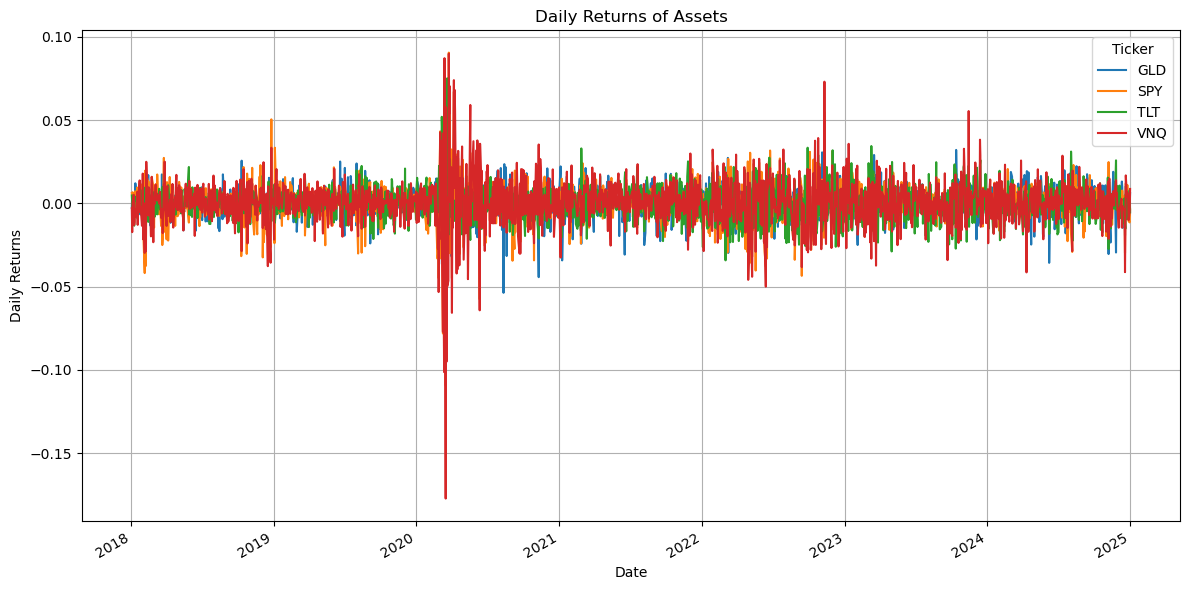

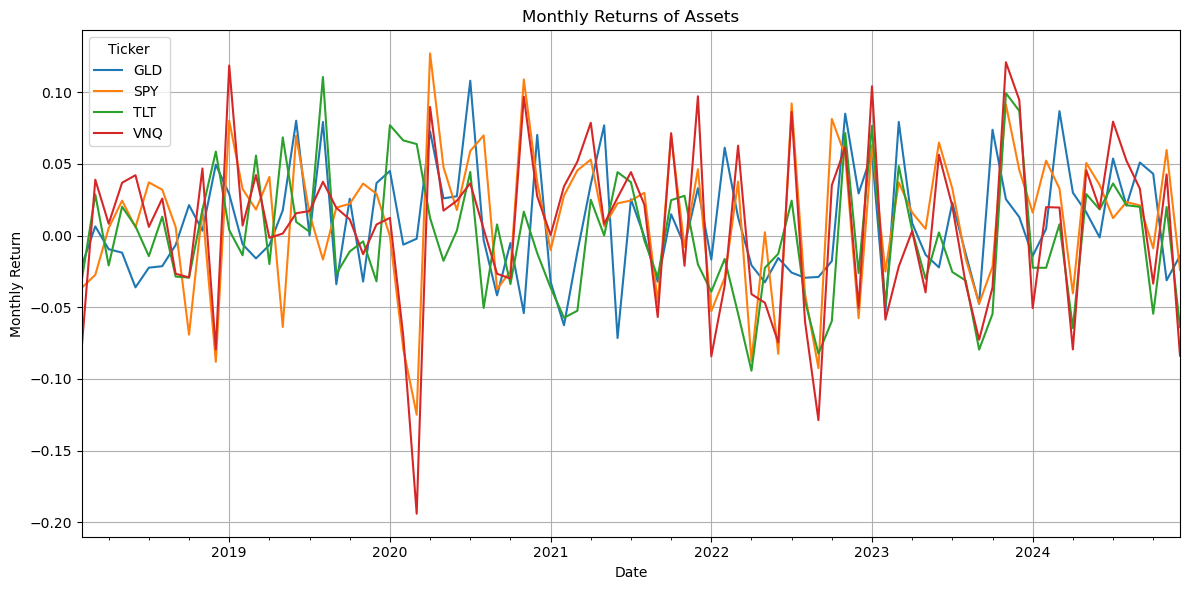

In [26]:
import matplotlib.pyplot as plt

returns.plot(figsize=(12,6))
plt.title('Daily Returns of Assets')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.grid(True)
plt.tight_layout()
plt.show()

monthly_return.plot(figsize=(12,6))
plt.title('Monthly Returns of Assets')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.grid(True)
plt.tight_layout()
plt.show()

Portfolio Total Return & Cumulative Return

In [27]:
weight_dict={'Aggressive':[0.6,0.1,0.2,0.1],'Balanced':[0.4,0.3,0.2,0.1],'Conservative':[0.2,0.5,0.2,0.1]}
weight_portfolio=pd.DataFrame(weight_dict,index=tickers)
print(weight_portfolio)
print(returns)
portfolio_returns=pd.DataFrame(index=returns.index)
for name in weight_portfolio.columns:
    weight=weight_portfolio[name]
    portfolio_returns[name]=(returns*weight).sum(axis=1)
cum_portfolio_return=(1+portfolio_returns).cumprod()
print(portfolio_returns.head())
print(cum_portfolio_return.head())


     Aggressive  Balanced  Conservative
SPY         0.6       0.4           0.2
TLT         0.1       0.3           0.5
GLD         0.2       0.2           0.2
VNQ         0.1       0.1           0.1
Ticker           GLD       SPY       TLT       VNQ
Date                                              
2018-01-03 -0.002637  0.006325  0.004781 -0.002903
2018-01-04  0.005127  0.004215 -0.000159 -0.017227
2018-01-05 -0.001036  0.006664 -0.002855  0.000494
2018-01-08 -0.000160  0.001829 -0.000636  0.005182
2018-01-09 -0.004628  0.002263 -0.013373 -0.012888
...              ...       ...       ...       ...
2024-12-24  0.001992  0.011115  0.004229  0.006643
2024-12-26  0.006751  0.000067 -0.000569  0.002684
2024-12-27 -0.006871 -0.010527 -0.008199 -0.010039
2024-12-30 -0.003190 -0.011412  0.008037 -0.004958
2024-12-31  0.006234 -0.003638 -0.005353  0.008719

[1760 rows x 4 columns]
            Aggressive  Balanced  Conservative
Date                                          
2018-01-03    0.00

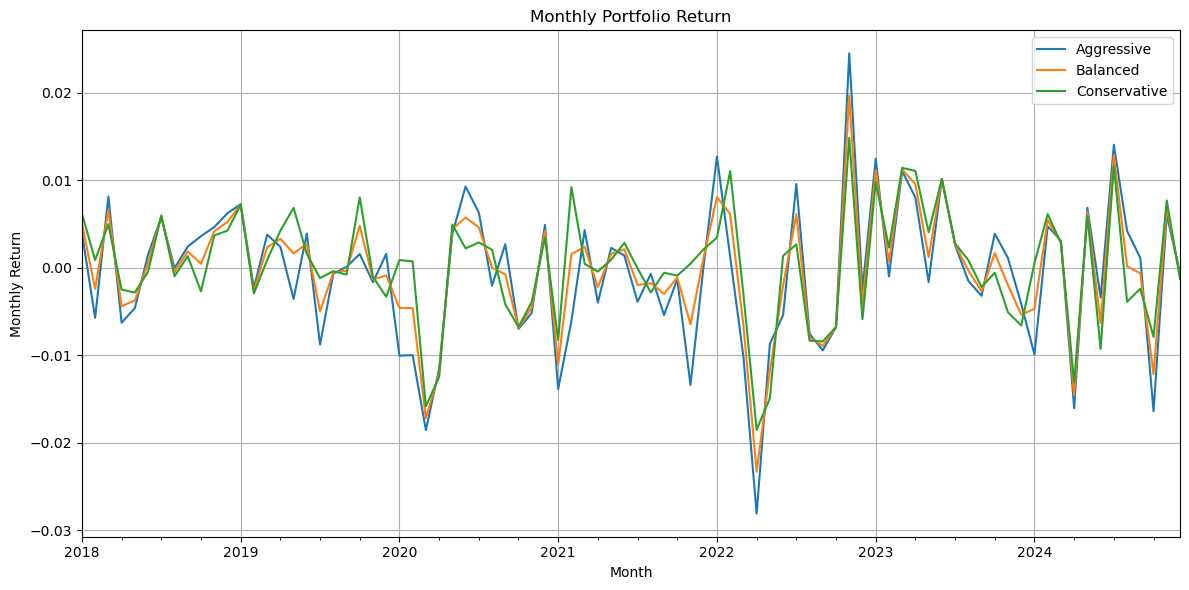

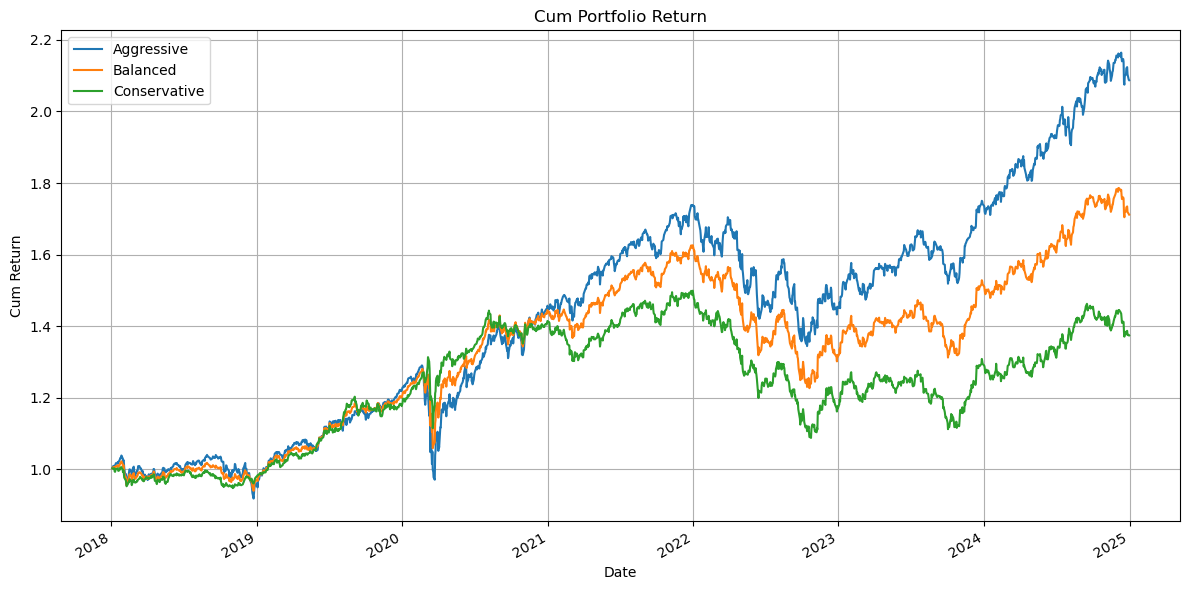

In [28]:
monthly_portfolio_return=portfolio_returns.resample('ME').ffill().dropna()
monthly_portfolio_return.plot(figsize=(12,6))
plt.title('Monthly Portfolio Return')
plt.xlabel('Month')
plt.ylabel('Monthly Return')
plt.grid(True)
plt.tight_layout()
plt.show()
cum_portfolio_return_plot=cum_portfolio_return.plot(figsize=(12,6))
plt.title('Cum Portfolio Return')
plt.xlabel('Date')
plt.ylabel('Cum Return')
plt.grid(True)
plt.tight_layout()
plt.show()

Annualized Volatility

In [29]:
import numpy as np
aggresive_return=portfolio_returns['Aggressive']
balanced_return=portfolio_returns['Balanced']
conservation_return=portfolio_returns['Conservative']
Volatility={'aggresive':aggresive_return.std()*np.sqrt(252),'balanced':balanced_return.std()*np.sqrt(252),'conservation':conservation_return.std()*np.sqrt(252)}
Annualized_volatility=pd.Series(Volatility,name='Annualized Volatility')
print(Annualized_volatility)


aggresive       0.140839
balanced        0.112333
conservation    0.106934
Name: Annualized Volatility, dtype: float64


Sharpe Ratio

In [30]:
risk_free_rate=0.02
annual_returns={'aggresive':aggresive_return.mean()*252,'balanced':balanced_return.mean()*252,'conservation':conservation_return.mean()*252}
sharpe_ratio={k:(annual_returns[k]-risk_free_rate)/Volatility[k] 
               for k in annual_returns}
sharpe_df=pd.Series(sharpe_ratio,name='Sharpe Ratio')
print(sharpe_df)

aggresive       0.676813
balanced        0.563333
conservation    0.292147
Name: Sharpe Ratio, dtype: float64


Max Drawdown

In [31]:
def max_drawdown(return_series):
    cum_portfolio_return=(1+return_series).cumprod()
    max_cum_return=cum_portfolio_return.cummax()
    dropdown=(cum_portfolio_return-max_cum_return)/max_cum_return
    return dropdown.min()
dropdowns={'aggresive':max_drawdown(aggresive_return),'balanced':max_drawdown(balanced_return),'conservation':max_drawdown(conservation_return)}
max_drawdowns=pd.Series(dropdowns,name='Max Drawdown')
print(max_drawdowns)

aggresive      -0.247356
balanced       -0.245569
conservation   -0.274322
Name: Max Drawdown, dtype: float64


In [32]:
merge_ratio=pd.concat([pd.Series(annual_returns,name='Annual Return'),Annualized_volatility,sharpe_df,max_drawdowns],axis=1)
merge_ratio.head()

,Annual Return,Annualized Volatility,Sharpe Ratio,Max Drawdown
aggresive,0.115321,0.140839,0.676813,-0.247356
balanced,0.083281,0.112333,0.563333,-0.245569
conservation,0.051240,0.106934,0.292147,-0.274322


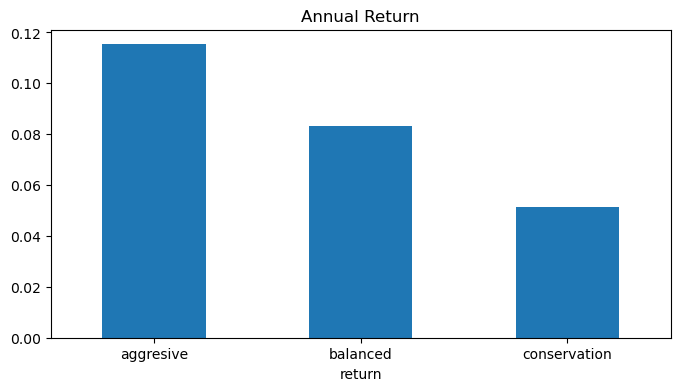

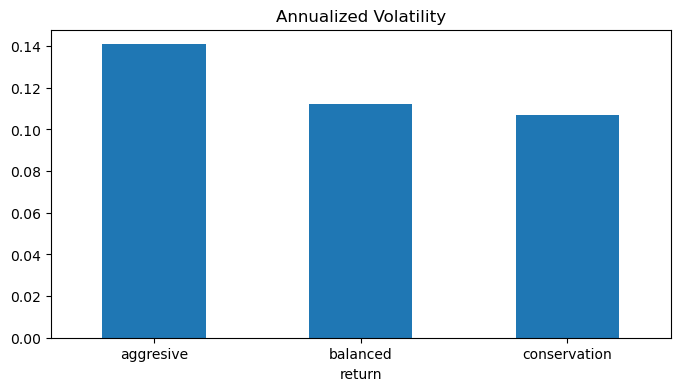

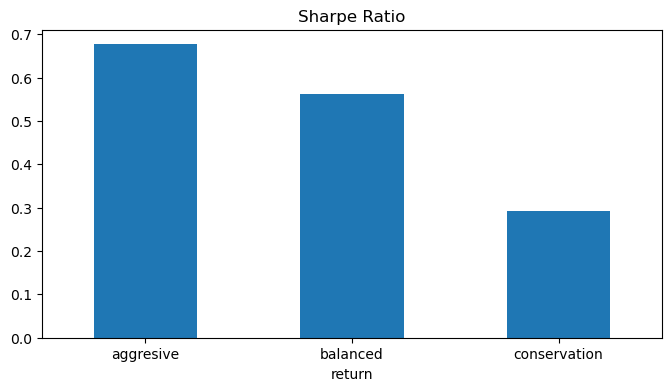

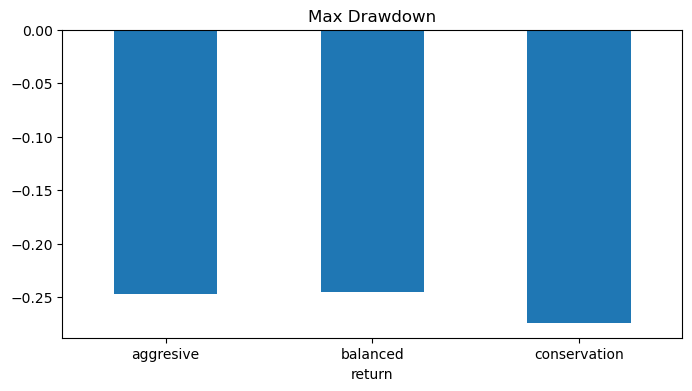

In [33]:
import matplotlib.pyplot as plt
merge_ratio['Annual Return'].plot(kind='bar',figsize=(8,4))
plt.title('Annual Return')
plt.xlabel('return')
plt.xticks(rotation=360)
plt.show()
merge_ratio['Annualized Volatility'].plot(kind='bar',figsize=(8,4))
plt.title('Annualized Volatility')
plt.xlabel('return')
plt.xticks(rotation=360)
plt.show()
merge_ratio['Sharpe Ratio'].plot(kind='bar',figsize=(8,4))
plt.title('Sharpe Ratio')
plt.xlabel('return')
plt.xticks(rotation=360)
plt.show()
merge_ratio['Max Drawdown'].plot(kind='bar',figsize=(8,4))
plt.title('Max Drawdown')
plt.xlabel('return')
plt.xticks(rotation=360)
plt.show()

Risk vs Return Portfolio Strategies Scatter Plot

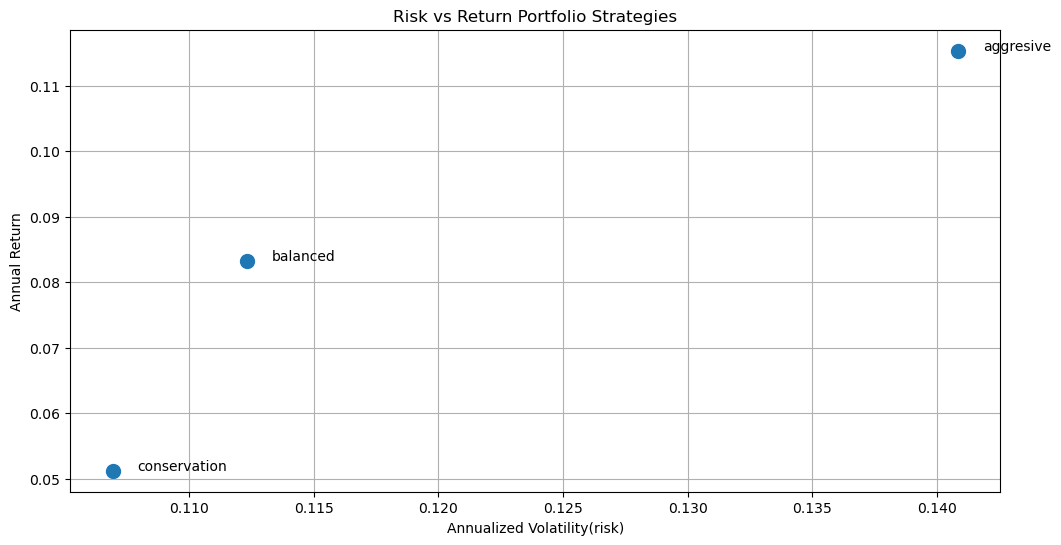

In [34]:
plt.figure(figsize=(12,6))
plt.scatter(merge_ratio['Annualized Volatility'],merge_ratio['Annual Return'],s=100)
for i in merge_ratio.index:
    plt.text(x=merge_ratio.loc[i,'Annualized Volatility']+0.001,y=merge_ratio.loc[i,'Annual Return'],s=i)
plt.xlabel('Annualized Volatility(risk)')
plt.ylabel('Annual Return')
plt.title('Risk vs Return Portfolio Strategies')
plt.grid(True)
plt.show()